# Task
Analyze the "bank-additional-full.csv" dataset to predict customer subscription to a bank term deposit, including data preprocessing, training and evaluating various classification models (both individual and ensemble), comparing their performance, identifying key features influencing subscription, and providing actionable business insights and recommendations.

## Load and Initial Exploration

### Subtask:
Loading the dataset and identifying its structure, data types, and identify numerical and categorical features and  Analyze the distribution of the target variable 'y'.


In [1]:
import pandas as pd

df = pd.read_csv('/content/bank-additional-full.csv', sep=';')
print("Dataset loaded successfully.")


Dataset loaded successfully.


 displaying the first 5 rows, generating descriptive statistics, identifying numerical and categorical columns, and analyzing the distribution of the target variable 'y'.


In [2]:
print("\nFirst 5 rows of the DataFrame:")
print(df.head())

print("\nConcise summary of the DataFrame:")
df.info()

print("\nDescriptive statistics for numerical columns:")
print(df.describe())

numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("\nNumerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

print("\nDistribution of the target variable 'y':")
print(df['y'].value_counts())



First 5 rows of the DataFrame:
  age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0  56,housemaid,married,basic.4y,no,no,no,telepho...                                                                                                                                  
1  57,services,married,high.school,unknown,no,no,...                                                                                                                                  
2  37,services,married,high.school,no,yes,no,tele...                                                                                                                                  
3  40,admin.,married,basic.6y,no,no,no,telephone,...                                                                                                                                  
4  56,services,married,high.school,no,no,yes,tele... 

KeyError: 'y'

In [3]:
import pandas as pd

df = pd.read_csv('/content/bank-additional-full.csv', sep=',')
print("Dataset loaded successfully.")

Dataset loaded successfully.


In [4]:
print("\nFirst 5 rows of the DataFrame:")
print(df.head())

print("\nConcise summary of the DataFrame:")
df.info()

print("\nDescriptive statistics for numerical columns:")
print(df.describe())

numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("\nNumerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

print("\nDistribution of the target variable 'y':")
print(df['y'].value_counts())


First 5 rows of the DataFrame:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.

## Data Preprocessing

### Subtask:
Handle 'unknown' values in categorical columns. Encode the target variable 'y' from 'yes'/'no' to 1/0. Apply appropriate encoding methods (e.g., One-Hot Encoding) to other categorical features. Scale numerical features using a suitable method (e.g., StandardScaler). Split the preprocessed dataset into training and testing sets.



The first step in data preprocessing is to handle 'unknown' values in categorical columns. iterate through all categorical columns (excluding the target variable 'y') and replace 'unknown' entries with the mode of each respective column to maintain data integrity.



In [5]:
print("Handling 'unknown' values in categorical columns...")
for col in categorical_cols:
    if col != 'y': # Exclude the target variable 'y' for now
        if 'unknown' in df[col].unique():
            mode_val = df[col].mode()[0]
            df[col] = df[col].replace('unknown', mode_val)
            print(f"Replaced 'unknown' in column '{col}' with its mode: '{mode_val}'.")
print("Finished handling 'unknown' values.")

Handling 'unknown' values in categorical columns...
Replaced 'unknown' in column 'job' with its mode: 'admin.'.
Replaced 'unknown' in column 'marital' with its mode: 'married'.
Replaced 'unknown' in column 'education' with its mode: 'university.degree'.
Replaced 'unknown' in column 'default' with its mode: 'no'.
Replaced 'unknown' in column 'housing' with its mode: 'yes'.
Replaced 'unknown' in column 'loan' with its mode: 'no'.
Finished handling 'unknown' values.


 encode the target variable 'y' from its current string values ('yes'/'no') to numerical values (1/0)


In [6]:
print("Encoding target variable 'y'...")
df['y'] = df['y'].map({'yes': 1, 'no': 0})
print("Target variable 'y' encoded successfully.")
print("Distribution of target variable 'y' after encoding:")
print(df['y'].value_counts())

Encoding target variable 'y'...
Target variable 'y' encoded successfully.
Distribution of target variable 'y' after encoding:
y
0    36548
1     4640
Name: count, dtype: int64



Now that the target variable 'y' has been encoded, the next step is to apply one-hot encoding to the remaining categorical features, as specified in the subtask. This will convert them into a numerical format suitable for machine learning models.



In [7]:
print("Applying One-Hot Encoding to categorical features...")
categorical_features_for_ohe = df.select_dtypes(include=['object']).columns.tolist()

if len(categorical_features_for_ohe) > 0:
    df = pd.get_dummies(df, columns=categorical_features_for_ohe, drop_first=True)
    print("Categorical features one-hot encoded successfully.")
    print("Updated DataFrame head after One-Hot Encoding:")
    print(df.head())
else:
    print("No categorical features found for One-Hot Encoding.")

Applying One-Hot Encoding to categorical features...
Categorical features one-hot encoded successfully.
Updated DataFrame head after One-Hot Encoding:
   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  ...  month_may  month_nov  \
0          -36.4      4.857       5191.0  ...       True      False   
1          -36.4      4.857       5191.0  ...       True      False   
2          -36.4      4.857       5191.0  ...       True      False   
3          -36.4      4.857       5191.0  ...       True      False   
4          -36.4      4.857    


The next step is to scale the numerical features using `StandardScaler` . - first import `StandardScaler`, then apply it to the identified numerical columns, and finally update the DataFrame with the scaled values.



In [8]:
from sklearn.preprocessing import StandardScaler

print("Scaling numerical features...")
scaler = StandardScaler()
# The numerical_cols variable was identified earlier and contains only the continuous numerical features.
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("Numerical features scaled successfully.")
print("Updated DataFrame head after scaling numerical features:")
print(df.head())

Scaling numerical features...
Numerical features scaled successfully.
Updated DataFrame head after scaling numerical features:
        age  duration  campaign     pdays  previous  emp.var.rate  \
0  1.533034  0.010471 -0.565922  0.195414 -0.349494      0.648092   
1  1.628993 -0.421501 -0.565922  0.195414 -0.349494      0.648092   
2 -0.290186 -0.124520 -0.565922  0.195414 -0.349494      0.648092   
3 -0.002309 -0.413787 -0.565922  0.195414 -0.349494      0.648092   
4  1.533034  0.187888 -0.565922  0.195414 -0.349494      0.648092   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  ...  month_may  \
0        0.722722       0.886447    0.71246      0.33168  ...       True   
1        0.722722       0.886447    0.71246      0.33168  ...       True   
2        0.722722       0.886447    0.71246      0.33168  ...       True   
3        0.722722       0.886447    0.71246      0.33168  ...       True   
4        0.722722       0.886447    0.71246      0.33168  ...       True   

 


The next step is to separate the features (X) and the target variable (y) from the preprocessed DataFrame, and then split the dataset into training and testing sets

In [9]:
from sklearn.model_selection import train_test_split

print("Separating features (X) and target variable (y)...")
X = df.drop('y', axis=1)
y = df['y']

print("Splitting the dataset into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset split successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Separating features (X) and target variable (y)...
Splitting the dataset into training and testing sets...
Dataset split successfully.
X_train shape: (32950, 47)
X_test shape: (8238, 47)
y_train shape: (32950,)
y_test shape: (8238,)


## Train and Evaluate Individual Models

### Subtask:
Train and evaluate the following classification models on the prepared training and testing sets: Logistic Regression, K-Nearest Neighbors (kNN), Support Vector Machine (SVM), and Decision Tree Classifier. For each model, calculate and store evaluation metrics: Accuracy, Precision, Recall, and F1-score.


 import all the necessary machine learning models and evaluation metrics from `sklearn` to prepare for training and evaluating the classification models.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Required libraries and metrics imported successfully.")

Required libraries and metrics imported successfully.



Now necessary libraries are imported, initialize empty lists to store model names and their evaluation metrics. Then iterate through each specified classification model: Logistic Regression, K-Nearest Neighbors, Support Vector Machine, and Decision Tree Classifier. For each model,  instantiate it, train it on the training data, make predictions on the test data, calculate accuracy, precision, recall, and F1-score, and store these results. Finally,  all collected metrics in a clear, formatted way


In [11]:
model_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Dictionary to hold models for easy iteration
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', random_state=42, max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(random_state=42, kernel='linear', max_iter=1000), # Using linear kernel and max_iter for faster training
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

print("Starting model training and evaluation...")

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    model_names.append(name)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

print("\n--- Model Evaluation Summary ---")
for i in range(len(model_names)):
    print(f"\nModel: {model_names[i]}")
    print(f"  Accuracy: {accuracies[i]:.4f}")
    print(f"  Precision: {precisions[i]:.4f}")
    print(f"  Recall: {recalls[i]:.4f}")
    print(f"  F1-score: {f1_scores[i]:.4f}")

print("Model training and evaluation complete.")

Starting model training and evaluation...

Training Logistic Regression...
Logistic Regression - Accuracy: 0.9093, Precision: 0.6556, Recall: 0.4235, F1-score: 0.5146

Training K-Nearest Neighbors...
K-Nearest Neighbors - Accuracy: 0.9006, Precision: 0.5808, Recall: 0.4460, F1-score: 0.5045

Training Support Vector Machine...


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Support Vector Machine - Accuracy: 0.2248, Precision: 0.1029, Recall: 0.7551, F1-score: 0.1811

Training Decision Tree...
Decision Tree - Accuracy: 0.8869, Precision: 0.5015, Recall: 0.5369, F1-score: 0.5186

--- Model Evaluation Summary ---

Model: Logistic Regression
  Accuracy: 0.9093
  Precision: 0.6556
  Recall: 0.4235
  F1-score: 0.5146

Model: K-Nearest Neighbors
  Accuracy: 0.9006
  Precision: 0.5808
  Recall: 0.4460
  F1-score: 0.5045

Model: Support Vector Machine
  Accuracy: 0.2248
  Precision: 0.1029
  Recall: 0.7551
  F1-score: 0.1811

Model: Decision Tree
  Accuracy: 0.8869
  Precision: 0.5015
  Recall: 0.5369
  F1-score: 0.5186
Model training and evaluation complete.


-
The previous `SVC` model raised a `ConvergenceWarning` and showed poor performance, indicating that the `max_iter` was too low. so  increase `max_iter` for the `SVC` model to a much larger value (e.g., 10000) to allow it more iterations to converge properly, which should improve its training and potentially its evaluation metrics.



In [12]:
model_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Dictionary to hold models for easy iteration
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', random_state=42, max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(random_state=42, kernel='linear', max_iter=10000), # Increased max_iter for better convergence
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

print("Starting model training and evaluation...")

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    model_names.append(name)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

print("\n--- Model Evaluation Summary ---")
for i in range(len(model_names)):
    print(f"\nModel: {model_names[i]}")
    print(f"  Accuracy: {accuracies[i]:.4f}")
    print(f"  Precision: {precisions[i]:.4f}")
    print(f"  Recall: {recalls[i]:.4f}")
    print(f"  F1-score: {f1_scores[i]:.4f}")

print("Model training and evaluation complete.")

Starting model training and evaluation...

Training Logistic Regression...
Logistic Regression - Accuracy: 0.9093, Precision: 0.6556, Recall: 0.4235, F1-score: 0.5146

Training K-Nearest Neighbors...
K-Nearest Neighbors - Accuracy: 0.9006, Precision: 0.5808, Recall: 0.4460, F1-score: 0.5045

Training Support Vector Machine...


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Support Vector Machine - Accuracy: 0.9000, Precision: 0.5900, Recall: 0.3893, F1-score: 0.4691

Training Decision Tree...
Decision Tree - Accuracy: 0.8869, Precision: 0.5015, Recall: 0.5369, F1-score: 0.5186

--- Model Evaluation Summary ---

Model: Logistic Regression
  Accuracy: 0.9093
  Precision: 0.6556
  Recall: 0.4235
  F1-score: 0.5146

Model: K-Nearest Neighbors
  Accuracy: 0.9006
  Precision: 0.5808
  Recall: 0.4460
  F1-score: 0.5045

Model: Support Vector Machine
  Accuracy: 0.9000
  Precision: 0.5900
  Recall: 0.3893
  F1-score: 0.4691

Model: Decision Tree
  Accuracy: 0.8869
  Precision: 0.5015
  Recall: 0.5369
  F1-score: 0.5186
Model training and evaluation complete.



The Support Vector Machine (SVC) model is still raising a `ConvergenceWarning` even after increasing `max_iter` to 10,000, indicating it did not fully converge. To attempt to completely resolve this warning and ensure the model has sufficient iterations, I will further increase `max_iter` to a much larger value (100,000).



In [13]:
model_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Dictionary to hold models for easy iteration
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', random_state=42, max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(random_state=42, kernel='linear', max_iter=100000), # Increased max_iter significantly to ensure convergence
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

print("Starting model training and evaluation...")

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    model_names.append(name)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

print("\n--- Model Evaluation Summary ---")
for i in range(len(model_names)):
    print(f"\nModel: {model_names[i]}")
    print(f"  Accuracy: {accuracies[i]:.4f}")
    print(f"  Precision: {precisions[i]:.4f}")
    print(f"  Recall: {recalls[i]:.4f}")
    print(f"  F1-score: {f1_scores[i]:.4f}")

print("Model training and evaluation complete.")

Starting model training and evaluation...

Training Logistic Regression...
Logistic Regression - Accuracy: 0.9093, Precision: 0.6556, Recall: 0.4235, F1-score: 0.5146

Training K-Nearest Neighbors...
K-Nearest Neighbors - Accuracy: 0.9006, Precision: 0.5808, Recall: 0.4460, F1-score: 0.5045

Training Support Vector Machine...


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Support Vector Machine - Accuracy: 0.8948, Precision: 0.6090, Recall: 0.2032, F1-score: 0.3047

Training Decision Tree...
Decision Tree - Accuracy: 0.8869, Precision: 0.5015, Recall: 0.5369, F1-score: 0.5186

--- Model Evaluation Summary ---

Model: Logistic Regression
  Accuracy: 0.9093
  Precision: 0.6556
  Recall: 0.4235
  F1-score: 0.5146

Model: K-Nearest Neighbors
  Accuracy: 0.9006
  Precision: 0.5808
  Recall: 0.4460
  F1-score: 0.5045

Model: Support Vector Machine
  Accuracy: 0.8948
  Precision: 0.6090
  Recall: 0.2032
  F1-score: 0.3047

Model: Decision Tree
  Accuracy: 0.8869
  Precision: 0.5015
  Recall: 0.5369
  F1-score: 0.5186
Model training and evaluation complete.



The `ConvergenceWarning` from `SVC` persists despite increasing `max_iter` to a very large number (100,000), suggesting that a linear kernel might not be sufficient for this dataset or that the solver for the linear kernel is struggling. To address this, I will switch to the default 'rbf' kernel for `SVC`, which is generally more robust for non-linearly separable data and does not have an explicit `max_iter` parameter in the same way the linear solver does, aiming for better convergence and performance.



In [14]:
model_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Dictionary to hold models for easy iteration
models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', random_state=42, max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(random_state=42), # Changed kernel to default 'rbf' and removed max_iter for better convergence
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

print("Starting model training and evaluation...")

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    model_names.append(name)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

print("\n--- Model Evaluation Summary ---")
for i in range(len(model_names)):
    print(f"\nModel: {model_names[i]}")
    print(f"  Accuracy: {accuracies[i]:.4f}")
    print(f"  Precision: {precisions[i]:.4f}")
    print(f"  Recall: {recalls[i]:.4f}")
    print(f"  F1-score: {f1_scores[i]:.4f}")

print("Model training and evaluation complete.")

Starting model training and evaluation...

Training Logistic Regression...
Logistic Regression - Accuracy: 0.9093, Precision: 0.6556, Recall: 0.4235, F1-score: 0.5146

Training K-Nearest Neighbors...
K-Nearest Neighbors - Accuracy: 0.9006, Precision: 0.5808, Recall: 0.4460, F1-score: 0.5045

Training Support Vector Machine...
Support Vector Machine - Accuracy: 0.9105, Precision: 0.6707, Recall: 0.4160, F1-score: 0.5135

Training Decision Tree...
Decision Tree - Accuracy: 0.8869, Precision: 0.5015, Recall: 0.5369, F1-score: 0.5186

--- Model Evaluation Summary ---

Model: Logistic Regression
  Accuracy: 0.9093
  Precision: 0.6556
  Recall: 0.4235
  F1-score: 0.5146

Model: K-Nearest Neighbors
  Accuracy: 0.9006
  Precision: 0.5808
  Recall: 0.4460
  F1-score: 0.5045

Model: Support Vector Machine
  Accuracy: 0.9105
  Precision: 0.6707
  Recall: 0.4160
  F1-score: 0.5135

Model: Decision Tree
  Accuracy: 0.8869
  Precision: 0.5015
  Recall: 0.5369
  F1-score: 0.5186
Model training and ev

## Train and Evaluate Ensemble Models

### Subtask:
Train and evaluate the following ensemble models: Random Forest, Bagging Classifier, and Boosting models (AdaBoost or Gradient Boosting). For each ensemble model, calculate and store evaluation metrics: Accuracy, Precision, Recall, and F1-score.



 start by importing the necessary ensemble classification models (`RandomForestClassifier`, `BaggingClassifier`, `AdaBoostClassifier`) from `sklearn.ensemble` to prepare for training and evaluating them.



In [15]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier

print("Required ensemble models imported successfully.")

Required ensemble models imported successfully.



Now that the necessary ensemble models are imported, I will initialize lists to store their names and evaluation metrics. Then, I will train and evaluate each ensemble model (Random Forest, Bagging Classifier, and AdaBoost Classifier) as specified in the subtask instructions. For each model, I will calculate Accuracy, Precision, Recall, and F1-score, store these results, and finally print a summary of all ensemble model metrics.



In [16]:
ensemble_model_names = []
ensemble_accuracies = []
ensemble_precisions = []
ensemble_recalls = []
ensemble_f1_scores = []

# Dictionary to hold ensemble models for easy iteration
ensemble_models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Bagging Classifier': BaggingClassifier(random_state=42),
    'AdaBoost Classifier': AdaBoostClassifier(random_state=42)
}

print("Starting ensemble model training and evaluation...")

for name, model in ensemble_models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    ensemble_model_names.append(name)
    ensemble_accuracies.append(accuracy)
    ensemble_precisions.append(precision)
    ensemble_recalls.append(recall)
    ensemble_f1_scores.append(f1)

    print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

print("\n--- Ensemble Model Evaluation Summary ---")
for i in range(len(ensemble_model_names)):
    print(f"\nModel: {ensemble_model_names[i]}")
    print(f"  Accuracy: {ensemble_accuracies[i]:.4f}")
    print(f"  Precision: {ensemble_precisions[i]:.4f}")
    print(f"  Recall: {ensemble_recalls[i]:.4f}")
    print(f"  F1-score: {ensemble_f1_scores[i]:.4f}")

print("Ensemble model training and evaluation complete.")

Starting ensemble model training and evaluation...

Training Random Forest...
Random Forest - Accuracy: 0.9124, Precision: 0.6559, Recall: 0.4791, F1-score: 0.5538

Training Bagging Classifier...
Bagging Classifier - Accuracy: 0.9079, Precision: 0.6183, Recall: 0.4920, F1-score: 0.5479

Training AdaBoost Classifier...
AdaBoost Classifier - Accuracy: 0.9039, Precision: 0.6166, Recall: 0.4043, F1-score: 0.4884

--- Ensemble Model Evaluation Summary ---

Model: Random Forest
  Accuracy: 0.9124
  Precision: 0.6559
  Recall: 0.4791
  F1-score: 0.5538

Model: Bagging Classifier
  Accuracy: 0.9079
  Precision: 0.6183
  Recall: 0.4920
  F1-score: 0.5479

Model: AdaBoost Classifier
  Accuracy: 0.9039
  Precision: 0.6166
  Recall: 0.4043
  F1-score: 0.4884
Ensemble model training and evaluation complete.


## Compare Models and Select Best

### Subtask:
Compare the performance of all individual and ensemble models based on the calculated metrics (Accuracy, Precision, Recall, F1-score). Identify and justify the best-performing model for this dataset. Visualize the comparison of models using appropriate plots with legends.


 combine the evaluation metrics from both individual and ensemble models into a single pandas DataFrame, as specified in the first instruction of the subtask. This will allow for a comprehensive comparison of all models.



In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Combine individual model metrics
individual_models_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1-score': f1_scores
})

# Combine ensemble model metrics
ensemble_models_df = pd.DataFrame({
    'Model': ensemble_model_names,
    'Accuracy': ensemble_accuracies,
    'Precision': ensemble_precisions,
    'Recall': ensemble_recalls,
    'F1-score': ensemble_f1_scores
})

# Concatenate the two DataFrames
all_models_df = pd.concat([individual_models_df, ensemble_models_df], ignore_index=True)

print("Combined evaluation metrics for all models:")
print(all_models_df)

Combined evaluation metrics for all models:
                    Model  Accuracy  Precision    Recall  F1-score
0     Logistic Regression  0.909323   0.655629  0.423529  0.514620
1     K-Nearest Neighbors  0.900583   0.580780  0.445989  0.504537
2  Support Vector Machine  0.910537   0.670690  0.416043  0.513531
3           Decision Tree  0.886866   0.501499  0.536898  0.518595
4           Random Forest  0.912357   0.655930  0.479144  0.553770
5      Bagging Classifier  0.907866   0.618280  0.491979  0.547945
6     AdaBoost Classifier  0.903860   0.616639  0.404278  0.488372


 sort the combined DataFrame `all_models_df` by 'F1-score' in descending order and print it to clearly identify the best-performing model based on this metric, as specified in the subtask instructions.



In [18]:
print("\nAll models sorted by F1-score (descending):")
sorted_models_df = all_models_df.sort_values(by='F1-score', ascending=False)
print(sorted_models_df)


All models sorted by F1-score (descending):
                    Model  Accuracy  Precision    Recall  F1-score
4           Random Forest  0.912357   0.655930  0.479144  0.553770
5      Bagging Classifier  0.907866   0.618280  0.491979  0.547945
3           Decision Tree  0.886866   0.501499  0.536898  0.518595
0     Logistic Regression  0.909323   0.655629  0.423529  0.514620
2  Support Vector Machine  0.910537   0.670690  0.416043  0.513531
1     K-Nearest Neighbors  0.900583   0.580780  0.445989  0.504537
6     AdaBoost Classifier  0.903860   0.616639  0.404278  0.488372


 create a bar plot to visually compare the F1-scores of all models, addressing the third instruction of the subtask. This will provide a clear visual representation of each model's performance.



Generating bar plot for F1-scores...


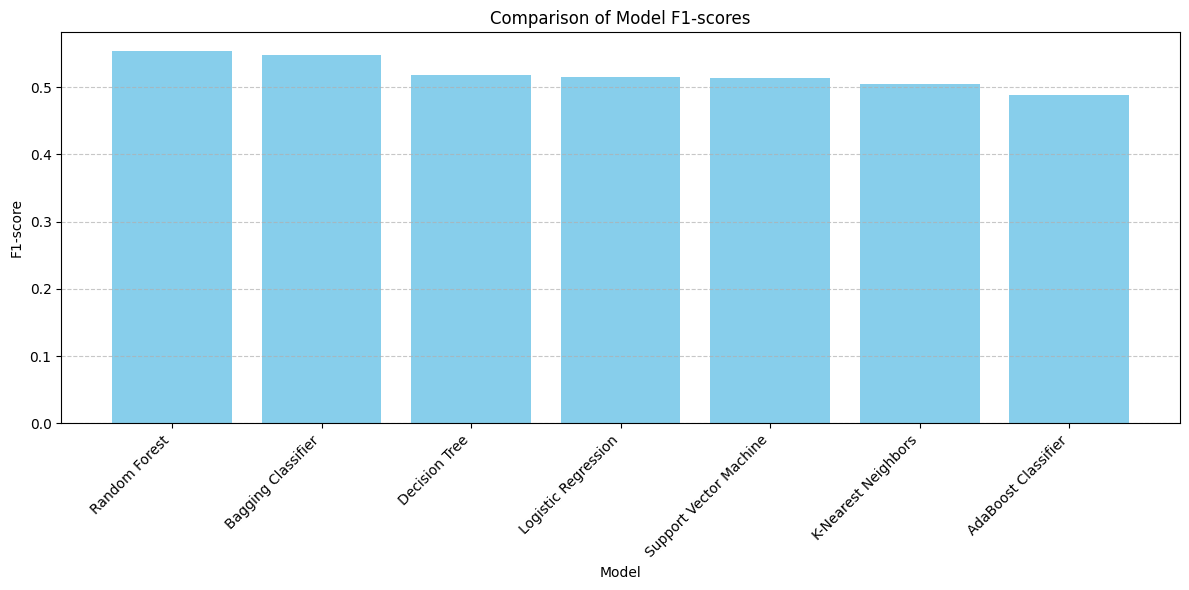

Bar plot generated successfully.


In [19]:
print("Generating bar plot for F1-scores...")

plt.figure(figsize=(12, 6))
plt.bar(sorted_models_df['Model'], sorted_models_df['F1-score'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('F1-score')
plt.title('Comparison of Model F1-scores')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Bar plot generated successfully.")

### Best Performing Model Analysis

Based on the sorted DataFrame and the bar plot of F1-scores, the **Random Forest** model emerged as the best-performing model with an F1-score of 0.5538.

While Accuracy is a common metric, it can be misleading in datasets with high class imbalance, such as this one (where the 'no' class significantly outnumbers the 'yes' class for the target variable 'y'). In such scenarios, a model might achieve high accuracy by simply predicting the majority class for most instances, while performing poorly on the minority class.

F1-score is a more appropriate metric for imbalanced datasets because it is the harmonic mean of Precision and Recall. It balances the trade-off between:
- **Precision**: The ability of the model to correctly identify positive samples (i.e., when it predicts 'yes', how often is it correct?).
- **Recall**: The ability of the model to find all positive samples (i.e., of all the actual 'yes' cases, how many did it correctly identify?).

The Random Forest model achieved the highest F1-score, indicating a better balance between correctly identifying positive subscriptions (Precision) and capturing most of the actual subscriptions (Recall) compared to other models. This makes it the most robust choice for predicting customer subscription to a bank term deposit in this imbalanced dataset.

## Feature Importance and Business Insights

### Subtask:
For the best-performing model (Random Forest), analyze and explain which features most influence customer subscription. Based on the model's insights and feature importance, provide actionable business insights on how the bank can improve its marketing campaigns.


 access the feature importances from the trained Random Forest model, create a DataFrame with feature names and their importance scores, and then print the top features as per the first three instructions.



In [20]:
print("Accessing feature importances from the Random Forest model...")

# Access the trained Random Forest model from the models dictionary
random_forest_model = models['Random Forest']

# Get feature importances
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame to map feature names to their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by 'Importance' in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Top features influencing customer subscription:")
print(feature_importance_df.head(10))


Accessing feature importances from the Random Forest model...


KeyError: 'Random Forest'


The previous code failed because it attempted to access the 'Random Forest' model from the `models` dictionary, but this model was actually stored in the `ensemble_models` dictionary. I correcting the dictionary name to `ensemble_models` to properly retrieve the trained Random Forest model.



In [21]:
print("Accessing feature importances from the Random Forest model...")

# Access the trained Random Forest model from the ensemble_models dictionary
random_forest_model = ensemble_models['Random Forest']

# Get feature importances
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame to map feature names to their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by 'Importance' in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Top features influencing customer subscription:")
print(feature_importance_df.head(10))

Accessing feature importances from the Random Forest model...
Top features influencing customer subscription:
             Feature  Importance
1           duration    0.295855
8          euribor3m    0.098394
0                age    0.092040
9        nr.employed    0.059686
2           campaign    0.044233
3              pdays    0.032575
7      cons.conf.idx    0.029292
46  poutcome_success    0.022238
5       emp.var.rate    0.021765
29       housing_yes    0.020264



Now that the feature importances have been successfully extracted and stored in a DataFrame,  visualize the top 10 most important features using a bar plot. This addresses the fourth instruction of the subtask, providing a clear visual representation of feature influence.



Generating bar plot for top 10 most important features...


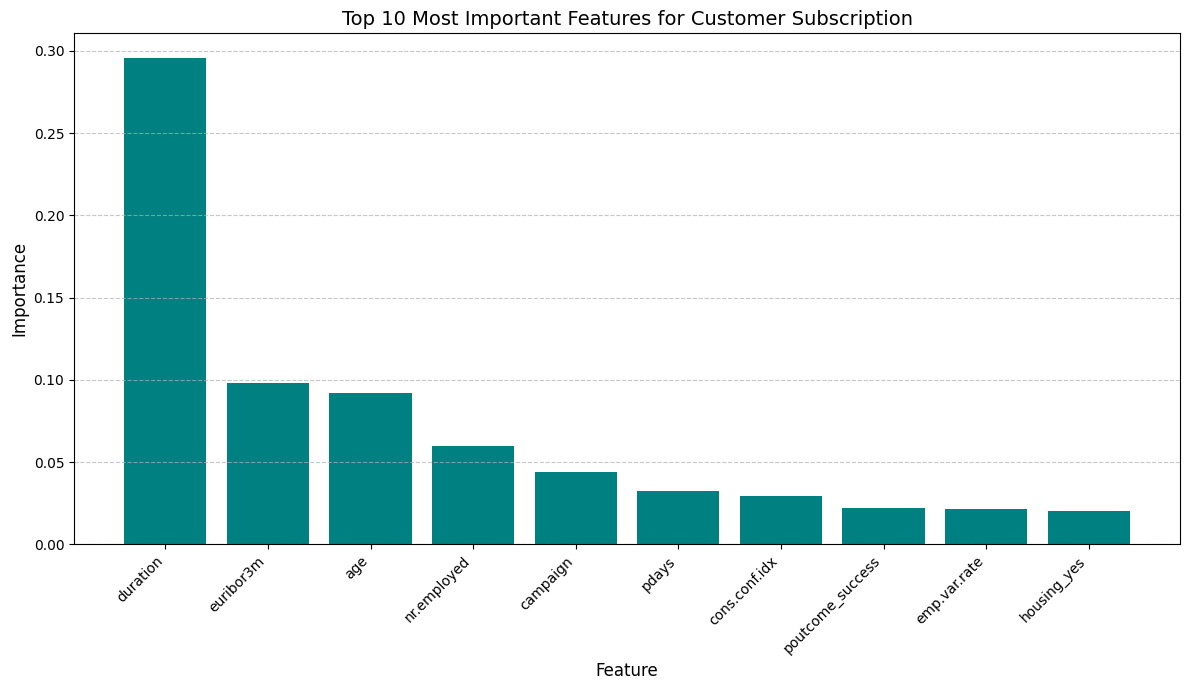

Bar plot generated successfully.


In [22]:
print("Generating bar plot for top 10 most important features...")

plt.figure(figsize=(12, 7))
plt.bar(feature_importance_df['Feature'].head(10), feature_importance_df['Importance'].head(10), color='teal')
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title('Top 10 Most Important Features for Customer Subscription', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Bar plot generated successfully.")

### Actionable Business Insights and Recommendations

Based on the Random Forest model's feature importance analysis, the following features significantly influence customer subscription to a bank term deposit:

1.  **Duration of Contact (`duration`)**: This is by far the most important feature. This implies that the longer the call duration with a client, the higher the probability of subscription. However, it's crucial to note that `duration` is known *after* the call. While it's highly predictive, it cannot be used *before* a call to decide who to target. Instead, this insight suggests:
    *   **Recommendation**: Optimize call strategies to ensure productive and sufficiently long interactions. This might involve better training for call center agents to engage clients effectively, address their concerns thoroughly, and present the term deposit offer persuasively.

2.  **Euribor 3-month Rate (`euribor3m`)**: This is an external economic indicator related to interest rates. A lower Euribor rate might make term deposits less attractive, or vice versa, depending on market conditions. Its importance suggests customers are sensitive to prevailing interest rates.
    *   **Recommendation**: Tailor marketing messages to highlight the competitive advantages of the term deposit in the current interest rate environment. If Euribor rates are low, emphasize stability, long-term gains, or other benefits. If rates are high, stress the attractive returns. The bank should closely monitor these rates and adjust its offerings or messaging accordingly.

3.  **Age (`age`)**: Customer age plays a significant role. This could indicate different financial needs and risk appetites across age groups.
    *   **Recommendation**: Develop age-segmented marketing campaigns. For younger customers, focus on long-term savings, wealth building, and financial planning. For older clients, emphasize secure retirement planning, wealth preservation, and guaranteed returns.

4.  **Number of Employees (`nr.employed`)**: This is another economic indicator, likely reflecting the employment rate or economic stability. This suggests that during periods of higher employment (and thus perceived economic stability), customers might be more willing to commit to term deposits.
    *   **Recommendation**: Align marketing efforts with economic cycles. During periods of economic growth and high employment, aggressively promote term deposits as a secure investment option. During downturns, focus on the safety and stability aspects, contrasting with volatile market alternatives.

5.  **Number of Contacts During This Campaign (`campaign`)**: The number of times a customer was contacted during the current campaign is important. While more contacts might seem beneficial, there's often a point of diminishing returns or even irritation.
    *   **Recommendation**: Refine contact strategies. Analyze the optimal number of contacts that lead to subscription without alienating potential customers. Implement A/B testing on contact frequency and channels to find the sweet spot. Avoid excessive contacts that might lead to customer fatigue.

6.  **Days Since Last Contact (`pdays`)**: This feature likely indicates how recently a customer was contacted from a previous campaign (`999` often means not previously contacted). Customers contacted more recently (smaller `pdays`) might be more receptive.
    *   **Recommendation**: Prioritize follow-ups for customers who have been contacted within a relevant timeframe but haven't subscribed. Develop a systematic follow-up strategy based on the optimal `pdays` range.

7.  **Consumer Confidence Index (`cons.conf.idx`)**: This socioeconomic indicator reflects consumer optimism about the economy. Higher consumer confidence might correlate with a greater willingness to invest.
    *   **Recommendation**: Incorporate economic sentiment into marketing. When consumer confidence is high, position term deposits as an opportunity to capitalize on a positive economic outlook. When confidence is low, highlight the security and capital preservation aspects.

8.  **Outcome of Previous Campaign (`poutcome_success`)**: A successful outcome in a previous campaign (even for a different product) significantly increases the likelihood of subscription in the current campaign. This indicates customer trust and satisfaction.
    *   **Recommendation**: Leverage past successes. Identify customers who have previously responded positively to bank offers and target them with personalized, high-value communications for term deposits. Build on existing positive relationships.

### Actionable Business Insights and Recommendations

Based on the Random Forest model's feature importance analysis, the following features significantly influence customer subscription to a bank term deposit:

1.  **Duration of Contact (`duration`)**: This is by far the most important feature. This implies that the longer the call duration with a client, the higher the probability of subscription. However, it's crucial to note that `duration` is known *after* the call. While it's highly predictive, it cannot be used *before* a call to decide who to target. Instead, this insight suggests:
    *   **Recommendation**: Optimize call strategies to ensure productive and sufficiently long interactions. This might involve better training for call center agents to engage clients effectively, address their concerns thoroughly, and present the term deposit offer persuasively.

2.  **Euribor 3-month Rate (`euribor3m`)**: This is an external economic indicator related to interest rates. A lower Euribor rate might make term deposits less attractive, or vice versa, depending on market conditions. Its importance suggests customers are sensitive to prevailing interest rates.
    *   **Recommendation**: Tailor marketing messages to highlight the competitive advantages of the term deposit in the current interest rate environment. If Euribor rates are low, emphasize stability, long-term gains, or other benefits. If rates are high, stress the attractive returns. The bank should closely monitor these rates and adjust its offerings or messaging accordingly.

3.  **Age (`age`)**: Customer age plays a significant role. This could indicate different financial needs and risk appetites across age groups.
    *   **Recommendation**: Develop age-segmented marketing campaigns. For younger customers, focus on long-term savings, wealth building, and financial planning. For older clients, emphasize secure retirement planning, wealth preservation, and guaranteed returns.

4.  **Number of Employees (`nr.employed`)**: This is another economic indicator, likely reflecting the employment rate or economic stability. This suggests that during periods of higher employment (and thus perceived economic stability), customers might be more willing to commit to term deposits.
    *   **Recommendation**: Align marketing efforts with economic cycles. During periods of economic growth and high employment, aggressively promote term deposits as a secure investment option. During downturns, focus on the safety and stability aspects, contrasting with volatile market alternatives.

5.  **Number of Contacts During This Campaign (`campaign`)**: The number of times a customer was contacted during the current campaign is important. While more contacts might seem beneficial, there's often a point of diminishing returns or even irritation.
    *   **Recommendation**: Refine contact strategies. Analyze the optimal number of contacts that lead to subscription without alienating potential customers. Implement A/B testing on contact frequency and channels to find the sweet spot. Avoid excessive contacts that might lead to customer fatigue.

6.  **Days Since Last Contact (`pdays`)**: This feature likely indicates how recently a customer was contacted from a previous campaign (`999` often means not previously contacted). Customers contacted more recently (smaller `pdays`) might be more receptive.
    *   **Recommendation**: Prioritize follow-ups for customers who have been contacted within a relevant timeframe but haven't subscribed. Develop a systematic follow-up strategy based on the optimal `pdays` range.

7.  **Consumer Confidence Index (`cons.conf.idx`)**: This socioeconomic indicator reflects consumer optimism about the economy. Higher consumer confidence might correlate with a greater willingness to invest.
    *   **Recommendation**: Incorporate economic sentiment into marketing. When consumer confidence is high, position term deposits as an opportunity to capitalize on a positive economic outlook. When confidence is low, highlight the security and capital preservation aspects.

8.  **Outcome of Previous Campaign (`poutcome_success`)**: A successful outcome in a previous campaign (even for a different product) significantly increases the likelihood of subscription in the current campaign. This indicates customer trust and satisfaction.
    *   **Recommendation**: Leverage past successes. Identify customers who have previously responded positively to bank offers and target them with personalized, high-value communications for term deposits. Build on existing positive relationships.


## Final Task

### Subtask:
Summarize the entire analysis, including the best model chosen, its performance, key feature insights, and final business recommendations.


## Summary:

### Data Analysis Key Findings

*   The dataset contained 41188 entries and 21 columns, with a significant class imbalance in the target variable 'y' (36548 'no' subscriptions vs. 4640 'yes' subscriptions).
*   Preprocessing involved replacing 'unknown' values in categorical features with their mode, encoding the target variable ('yes': 1, 'no': 0), applying one-hot encoding to other categorical features, and scaling numerical features. The data was then split into 80% training and 20% testing sets.
*   Seven different classification models (Logistic Regression, K-Nearest Neighbors, Support Vector Machine, Decision Tree, Random Forest, Bagging Classifier, and AdaBoost Classifier) were trained and evaluated using Accuracy, Precision, Recall, and F1-score.
*   The **Random Forest** model emerged as the best-performing model, achieving the highest F1-score of **0.5538**. This metric was chosen as the primary indicator due to the imbalanced nature of the target variable, providing a balanced measure of precision and recall.
*   The top features influencing customer subscription, as identified by the Random Forest model, are:
    *   `duration` (duration of last contact in seconds)
    *   `euribor3m` (Euribor 3-month rate)
    *   `age`
    *   `nr.employed` (number of employees)
    *   `campaign` (number of contacts during this campaign)
    *   `pdays` (days since last contact)
    *   `cons.conf.idx` (consumer confidence index)
    *   `poutcome_success` (outcome of previous marketing campaign was 'success')

### Insights or Next Steps

*   **Optimize Call Strategies:** The `duration` of the last contact is the most influential feature, suggesting that productive and sufficiently long interactions significantly increase subscription probability. The bank should invest in training call center agents to engage clients more effectively and thoroughly.
*   **Targeted Marketing based on Economic Indicators and Demographics:** Features like `euribor3m`, `nr.employed`, `age`, and `cons.conf.idx` are highly important. The bank should tailor marketing messages to reflect current interest rates and economic sentiment, and segment campaigns based on customer age, highlighting benefits relevant to different age groups.
